In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ligo.skymap.plot
import dhutil as dh
from astropy.io import ascii
from mpl_toolkits.axes_grid1 import make_axes_locatable

/home/snu/.local/lib/python3.11/site-packages/ligo/lw/lsctables.py:89: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


In [2]:
tile_center = ascii.read("displaycenter.txt").to_pandas()
summary = pd.read_csv('7DT_ref_cat_summary.csv')

In [3]:
total_num = summary['total_num']
nan_count = summary['nan_count']
under_12 = summary['9'] + summary['10'] + summary['11']
wmean_mag = summary['wmean_mag']

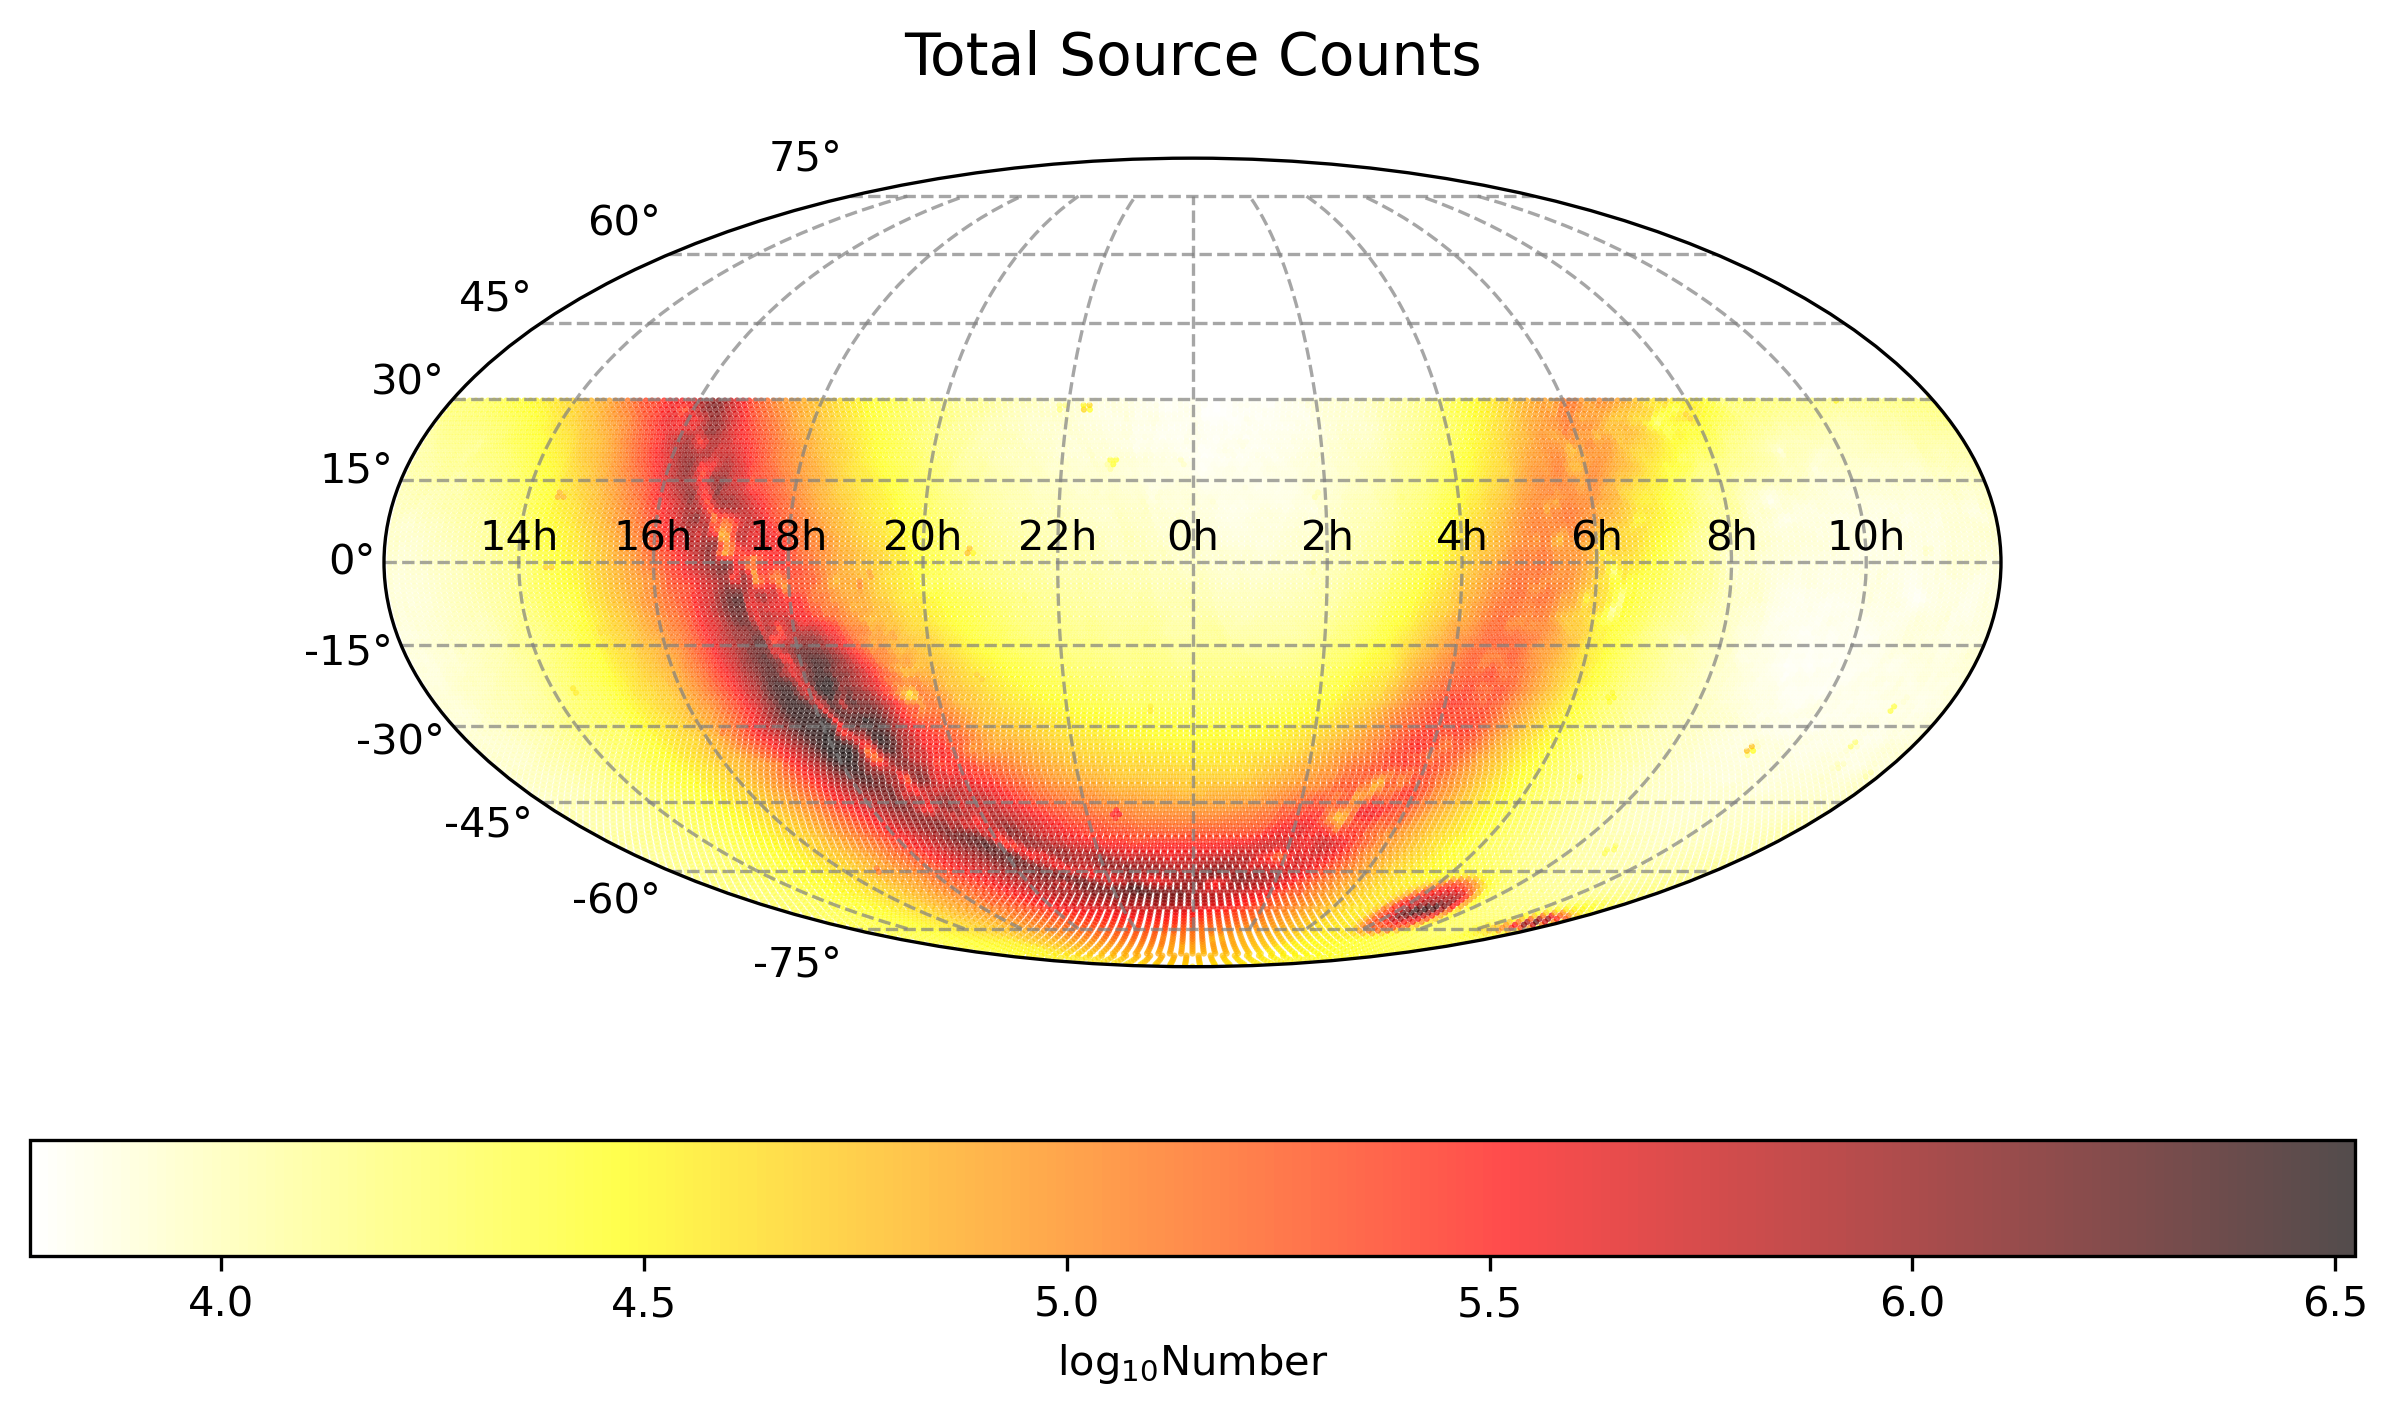

In [7]:
# Example RA and Dec data (in degrees)
ra_deg = tile_center['ra']
dec_deg = tile_center['dec']

# Convert RA/Dec to radians
ra_rad = np.radians(ra_deg)  # RA to radians
dec_rad = np.radians(dec_deg)  # Dec to radians

# Adjust RA for Mollweide projection
ra_rad = np.pi - ra_rad  # Convert to Mollweide convention (-π to π)

# Set up the Mollweide projection
fig = plt.figure(figsize=(10, 5), dpi=300)
ax = fig.add_subplot(111, projection="mollweide")

# Plot the data points
sct = ax.scatter(ra_rad, dec_rad, marker='.', c=np.log10(total_num), cmap='hot_r', s=1, alpha=0.7)
plt.colorbar(sct, orientation='horizontal', label=r'$\rm log_{10}$Number')

# Add gridlines and labels
ax.grid(True, linestyle='--', color='gray', alpha=0.7)
ax.set_xticklabels(['14h', '16h', '18h', '20h', '22h', '0h', '2h', '4h', '6h', '8h', '10h'], fontsize=10)

# "Total Source Counts"
# "m < 12 mag Counts" PuBu
# r"Weighted Mean ($\Sigma \frac{1}{m_i^2} m_i$) Counts" bone_r
# Add title
ax.set_title("Total Source Counts", fontsize=14, pad=20)

# Show the plot
plt.show()